# STOCK PRICE PREDICTION  

DESCRIPTION  :
    
    Predicting the stock prices for 11 Energy based companies.
    This dataset contains data for 6 years from 2010 -2023.
    Consists of the following columns:
        
        Open  - The opening price of the stock
        High  - The high price of that day 
        Low   - The low price of that day
        Close - The closed price of that day 
        Adjusted close  - The stocks closing price that has been amended to include any 
                          distributions/corporate actions that occurs before next days open
        Volume  - The amount of stocks traded during that day 
        

In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [16]:
# import the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt

# importing stock data from Yahoo finance
import yfinance as yf  

import seaborn as sns
#import ta

from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima


# The adfuller function from the statsmodels.tsa.stattools module is used to perform the Augmented Dickey-Fuller (ADF) 
# test for unit root in a time series.
#It helps determine whether a time series is stationary or not.
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller 

from sklearn.model_selection import train_test_split

from scipy.stats import skew

import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input

#Arima
from pmdarima import auto_arima


import warnings
warnings.filterwarnings('ignore')

Power:


In [2]:
tickers_S = ['TATAPOWER.NS', 'ADANIGREEN.NS', 'ADANIPOWER.NS', 'ADANITRANS.NS', 'GIPCL.NS', 'JSWENERGY.NS', 'NHPC.NS', 'NTPC.NS', 'NLCINDIA.NS', 'POWERGRID.NS', 'PTC.NS']

In [3]:
tickers_S = ['TATAPOWER.NS', 'ADANIGREEN.NS', 'ADANIPOWER.NS', 'ADANITRANS.NS', 'GIPCL.NS', 'JSWENERGY.NS', 'NHPC.NS', 'NTPC.NS', 'NLCINDIA.NS', 'POWERGRID.NS', 'PTC.NS']
data = pd.DataFrame()

for ticker in tickers_S:
    temp_df = yf.download(ticker, start='2010-01-01', end='2023-05-30',actions=True)
    temp_df['Company'] = ticker
    data = pd.concat([data, temp_df])

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
#importing our data to csv file

data.to_csv('Stock.csv')

# DATA PRE-PROCESSING

In [7]:
data.head(10)

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Company
Date,,,,,,,,,
2010-01-04,133.751373,135.097580,133.577682,134.079483,103.027641,3172720,0.0,0.0,TATAPOWER.NS
2010-01-05,134.716400,137.997452,134.422058,136.033646,104.529236,4254349,0.0,0.0,TATAPOWER.NS
2010-01-06,136.067413,144.366562,136.067413,142.344849,109.378822,8747201,0.0,0.0,TATAPOWER.NS
2010-01-07,142.822540,144.945572,139.444977,142.933517,109.831154,5495560,0.0,0.0,TATAPOWER.NS
2010-01-08,143.305054,144.077057,141.355713,142.856308,109.771820,3916987,0.0,0.0,TATAPOWER.NS
2010-01-11,143.314697,146.460648,141.490814,142.822540,109.745880,4785645,0.0,0.0,TATAPOWER.NS
2010-01-12,145.659683,145.659683,140.902161,143.700699,110.420654,3978032,0.0,0.0,TATAPOWER.NS
2010-01-13,142.822540,144.636765,142.397934,143.773087,110.476265,1436523,0.0,0.0,TATAPOWER.NS
2010-01-14,144.270065,145.389481,139.671753,140.545105,107.995857,5188156,0.0,0.0,TATAPOWER.NS


we can see that data for some of the dates is missing the reason for that is on weekends and holidays Stock Market remains closed hence no trading happens on these days.

In [8]:
data.shape

(32924, 9)

From this we can conclude there are 32924 rows and 9 columns or features in our dataset

In [9]:
# check the datatype of index column which represents the date 

type(data.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [10]:
#The data.info() method is used to display information about a Pandas DataFrame, including the 
# number of non-null values, the data type of each column, and the memory usage of the DataFrame

data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32924 entries, 2010-01-04 to 2023-05-29
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          32924 non-null  float64
 1   High          32924 non-null  float64
 2   Low           32924 non-null  float64
 3   Close         32924 non-null  float64
 4   Adj Close     32924 non-null  float64
 5   Volume        32924 non-null  int64  
 6   Dividends     32924 non-null  float64
 7   Stock Splits  32924 non-null  float64
 8   Company       32924 non-null  object 
dtypes: float64(7), int64(1), object(1)
memory usage: 2.5+ MB


In [11]:
 # Descriptive statistical measures of the features.

data.describe()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
count,32924.000000,32924.000000,32924.000000,32924.000000,32924.000000,3.292400e+04,32924.000000,32924.000000
mean,153.794414,156.693518,150.622007,153.567728,138.059787,5.218005e+06,0.009396,0.000381
std,341.406344,348.911467,332.479471,340.658915,343.274558,1.113030e+07,0.163970,0.055991
min,15.000000,15.200000,14.800000,15.050000,8.666217,0.000000e+00,0.000000,0.000000
25%,59.000000,60.037499,58.000000,58.900002,45.670457,5.706892e+05,0.000000,0.000000
50%,82.125023,83.500000,81.000000,82.050003,65.038681,2.172586e+06,0.000000,0.000000
75%,123.699997,125.449997,121.791664,123.583336,95.050003,5.686329e+06,0.000000,0.000000
max,4165.000000,4236.750000,3991.100098,4105.399902,4105.399902,3.815647e+08,7.340000,10.000000


In [12]:
# Checking for null values 

data.isnull().sum()

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
Company         0
dtype: int64

There are no null values in our data

# EDA- Exploratory Data Analysis

EDA- Exploratory Data Analysis

EDA also known as Exploratory Data Analysis is a technique that is used to analyze the data through visualization
and manipulation.

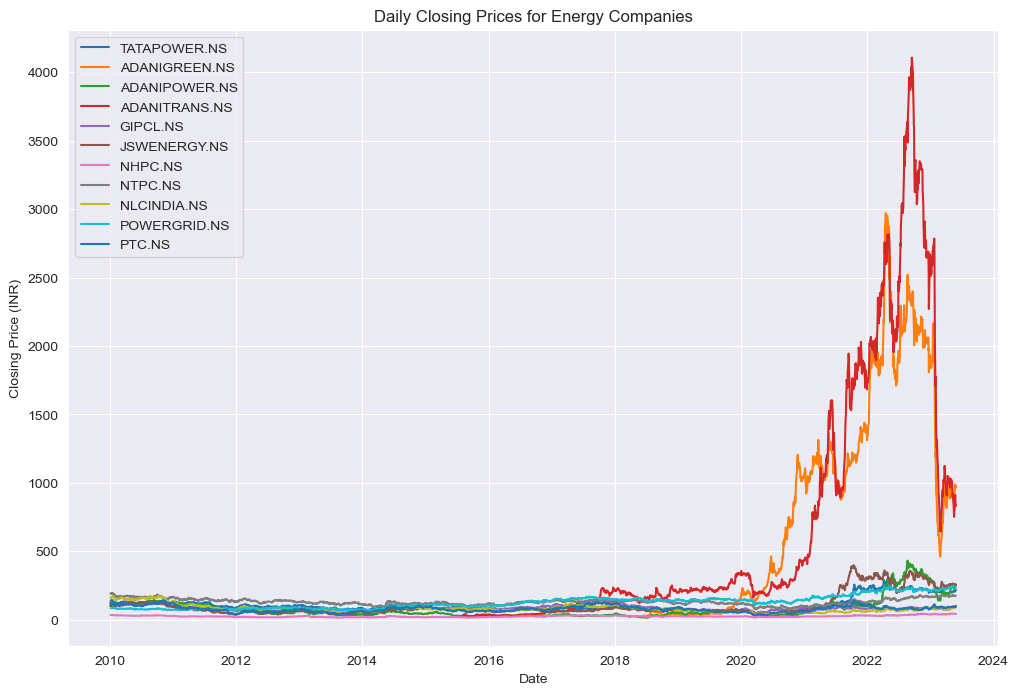

In [13]:
# Line plot of daily closing prices for each company
sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))
for i in tickers_S:
    temp_df = data[data['Company'] == i]
    plt.plot(temp_df.index, temp_df['Close'], label=i)
plt.xlabel("Date")
plt.ylabel("Closing Price (INR)")
plt.title("Daily Closing Prices for Energy Companies")
plt.legend()
plt.show()

It is evident from the graph that out of 11 companies 2 companies "Adani Trans" and "Adani Greens" have high "Closing price"over 
the last 2 years. 

And also "Adani Trans" have high closing price in 2023 compared to "Adani Trans" .



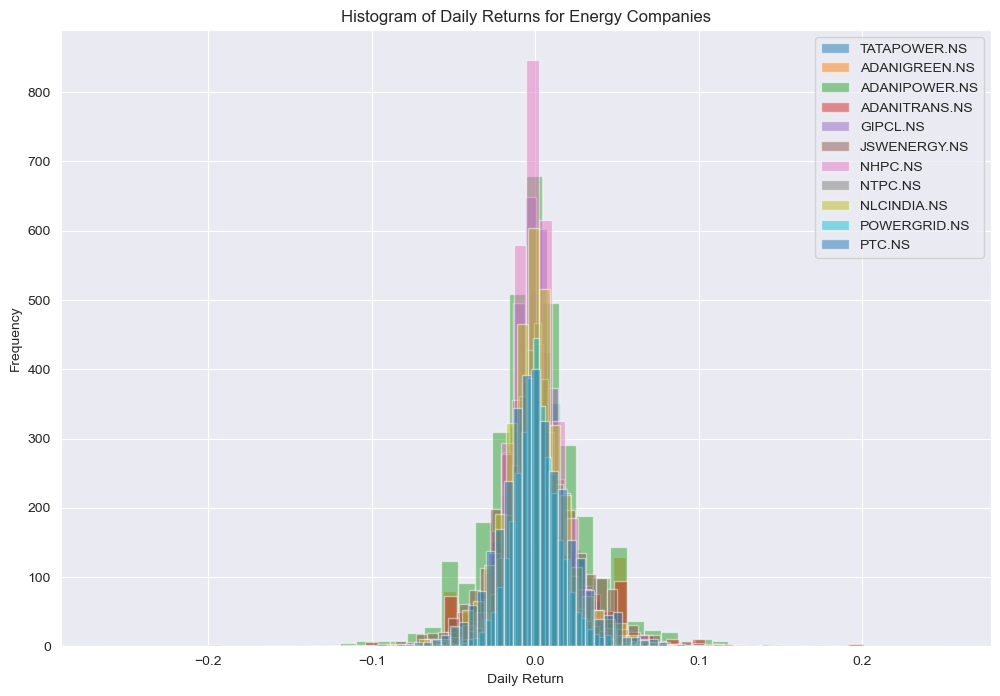

In [14]:
# Histogram of daily returns for each company
plt.figure(figsize=(12, 8))
for i in tickers_S:    # iterate over each ticker symbol in the tickers_S list.
    temp_df = data[data['Company'] == i]   #  For each ticker, we create a temporary DataFrame (temp_df) by filtering the data DataFrame to include only rows where the 'Company' column matches the ticker symbol.
    temp_df['Return'] = temp_df['Close'].pct_change() # calculate the daily return for each company by applying the pct_change() method to the 'Close' column of temp_df
    plt.hist(temp_df['Return'], bins=50, alpha=0.5, label=i)
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.title("Histogram of Daily Returns for Energy Companies")
plt.legend()
plt.show()

From the histogram, we can observe that the distribution of daily returns for each company is different. Some companies have a relatively stable return distribution with a low variance, while others have a more volatile return distribution with a higher variance. We can also observe that some companies have a higher frequency of positive daily returns,
while others have a higher frequency of negative daily returns.

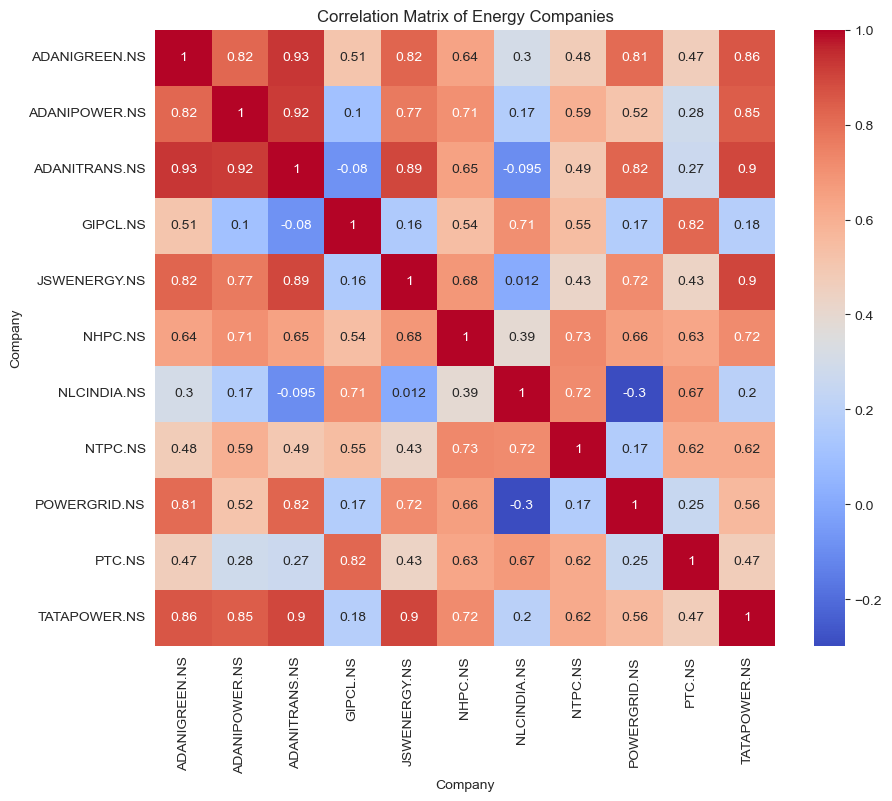

In [15]:
# Heat map of correlation matrix
corr = data.pivot_table(values='Close', index=data.index, columns='Company').corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title("Correlation Matrix of Energy Companies")
plt.show()

There is a positive correlation between TATAPOWER and NTPC, This indicates that the daily closing prices of these two companies tend to move in the same direction.

There is also a positive correlation between NHPC and NTPC, This suggests that the daily closing prices of these two companies are also somewhat positively correlated.

There are most of the off-diagonal cells are shaded in various shades of yellow, indicating moderate positive correlations between the different energy companies. This suggests that the daily closing prices of these companies are generally moving in the same direction, although not perfectly correlated.

No strong negative correlations between any of the pairs of companies.

Most of the off-diagonal cells are shaded in various shades of yellow, indicating moderate positive correlations between the different energy companies. 

This suggests that the daily closing prices of these companies are generally moving in the same direction, although not perfectly correlated.

In [16]:
# Calculate summary statistics of the 'Close' column for each company in the dataset
print(data.groupby('Company')['Close'].describe())


                count        mean         std        min         25%  \
Company                                                                
ADANIGREEN.NS  1221.0  853.561588  788.872082  25.200001   60.900002   
ADANIPOWER.NS  3308.0   78.306711   72.892434  15.450000   34.687501   
ADANITRANS.NS  1931.0  685.559839  941.613953  26.049999  124.025002   
GIPCL.NS       3308.0   84.517216   17.951921  45.849998   71.800003   
JSWENERGY.NS   3308.0  103.862273   79.109765  35.000000   62.250000   
NHPC.NS        3308.0   25.288770    5.900236  15.050000   20.450001   
NLCINDIA.NS    3308.0   81.032935   26.437487  39.299999   63.599998   
NTPC.NS        3308.0  131.279084   21.909140  76.400002  116.691664   
POWERGRID.NS   3308.0  126.692055   45.743525  68.512520   82.725021   
PTC.NS         3308.0   78.966702   21.671111  32.799999   61.849998   
TATAPOWER.NS   3308.0  103.249273   50.047904  27.299999   73.349998   

                      50%          75%          max  
Company  

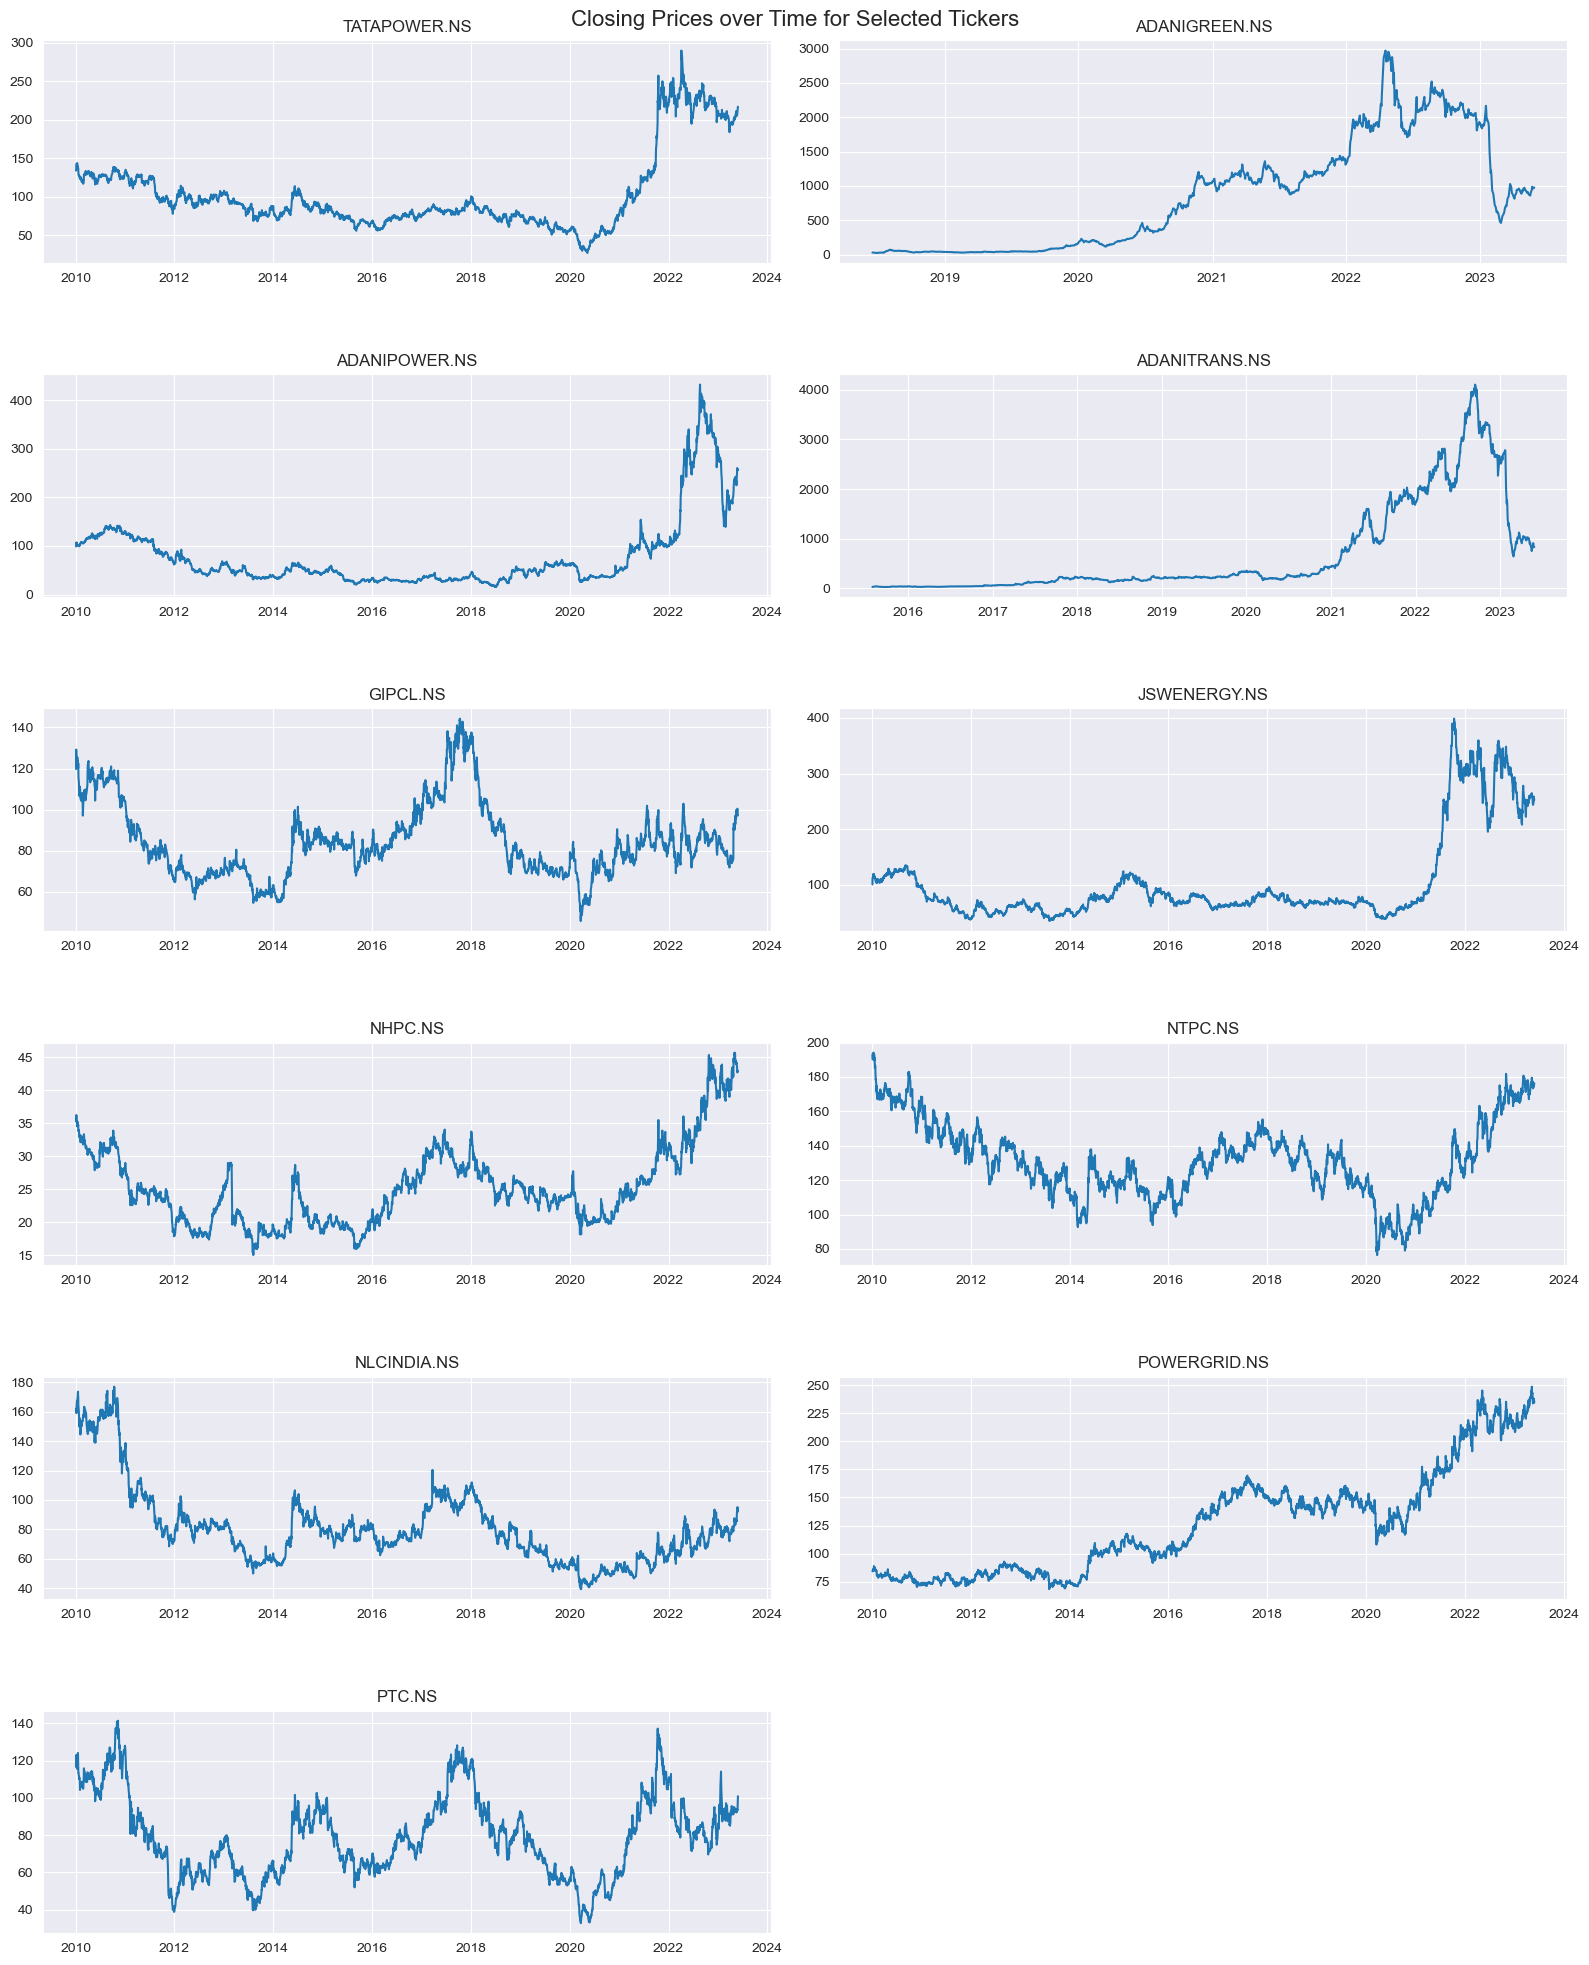

In [17]:
# Visualize trends in data over time
# Set up the subplots
fig, axs = plt.subplots(nrows=6, ncols=2, figsize=(16, 20))

# Plot each line plot on a separate subplot
for i, ax in enumerate(axs.flat):
    if i < len(tickers_S):
        ticker_data = data[data['Company'] == tickers_S[i]]
        ax.plot(ticker_data.index, ticker_data['Close'])
        ax.set_title(tickers_S[i])
    else:
        ax.axis('off')  # Hide empty subplots

# Add common labels and adjust spacing
fig.suptitle('Closing Prices over Time for Selected Tickers', fontsize=16)
fig.tight_layout()
plt.subplots_adjust(hspace=0.5)

# Show the plot
plt.show()





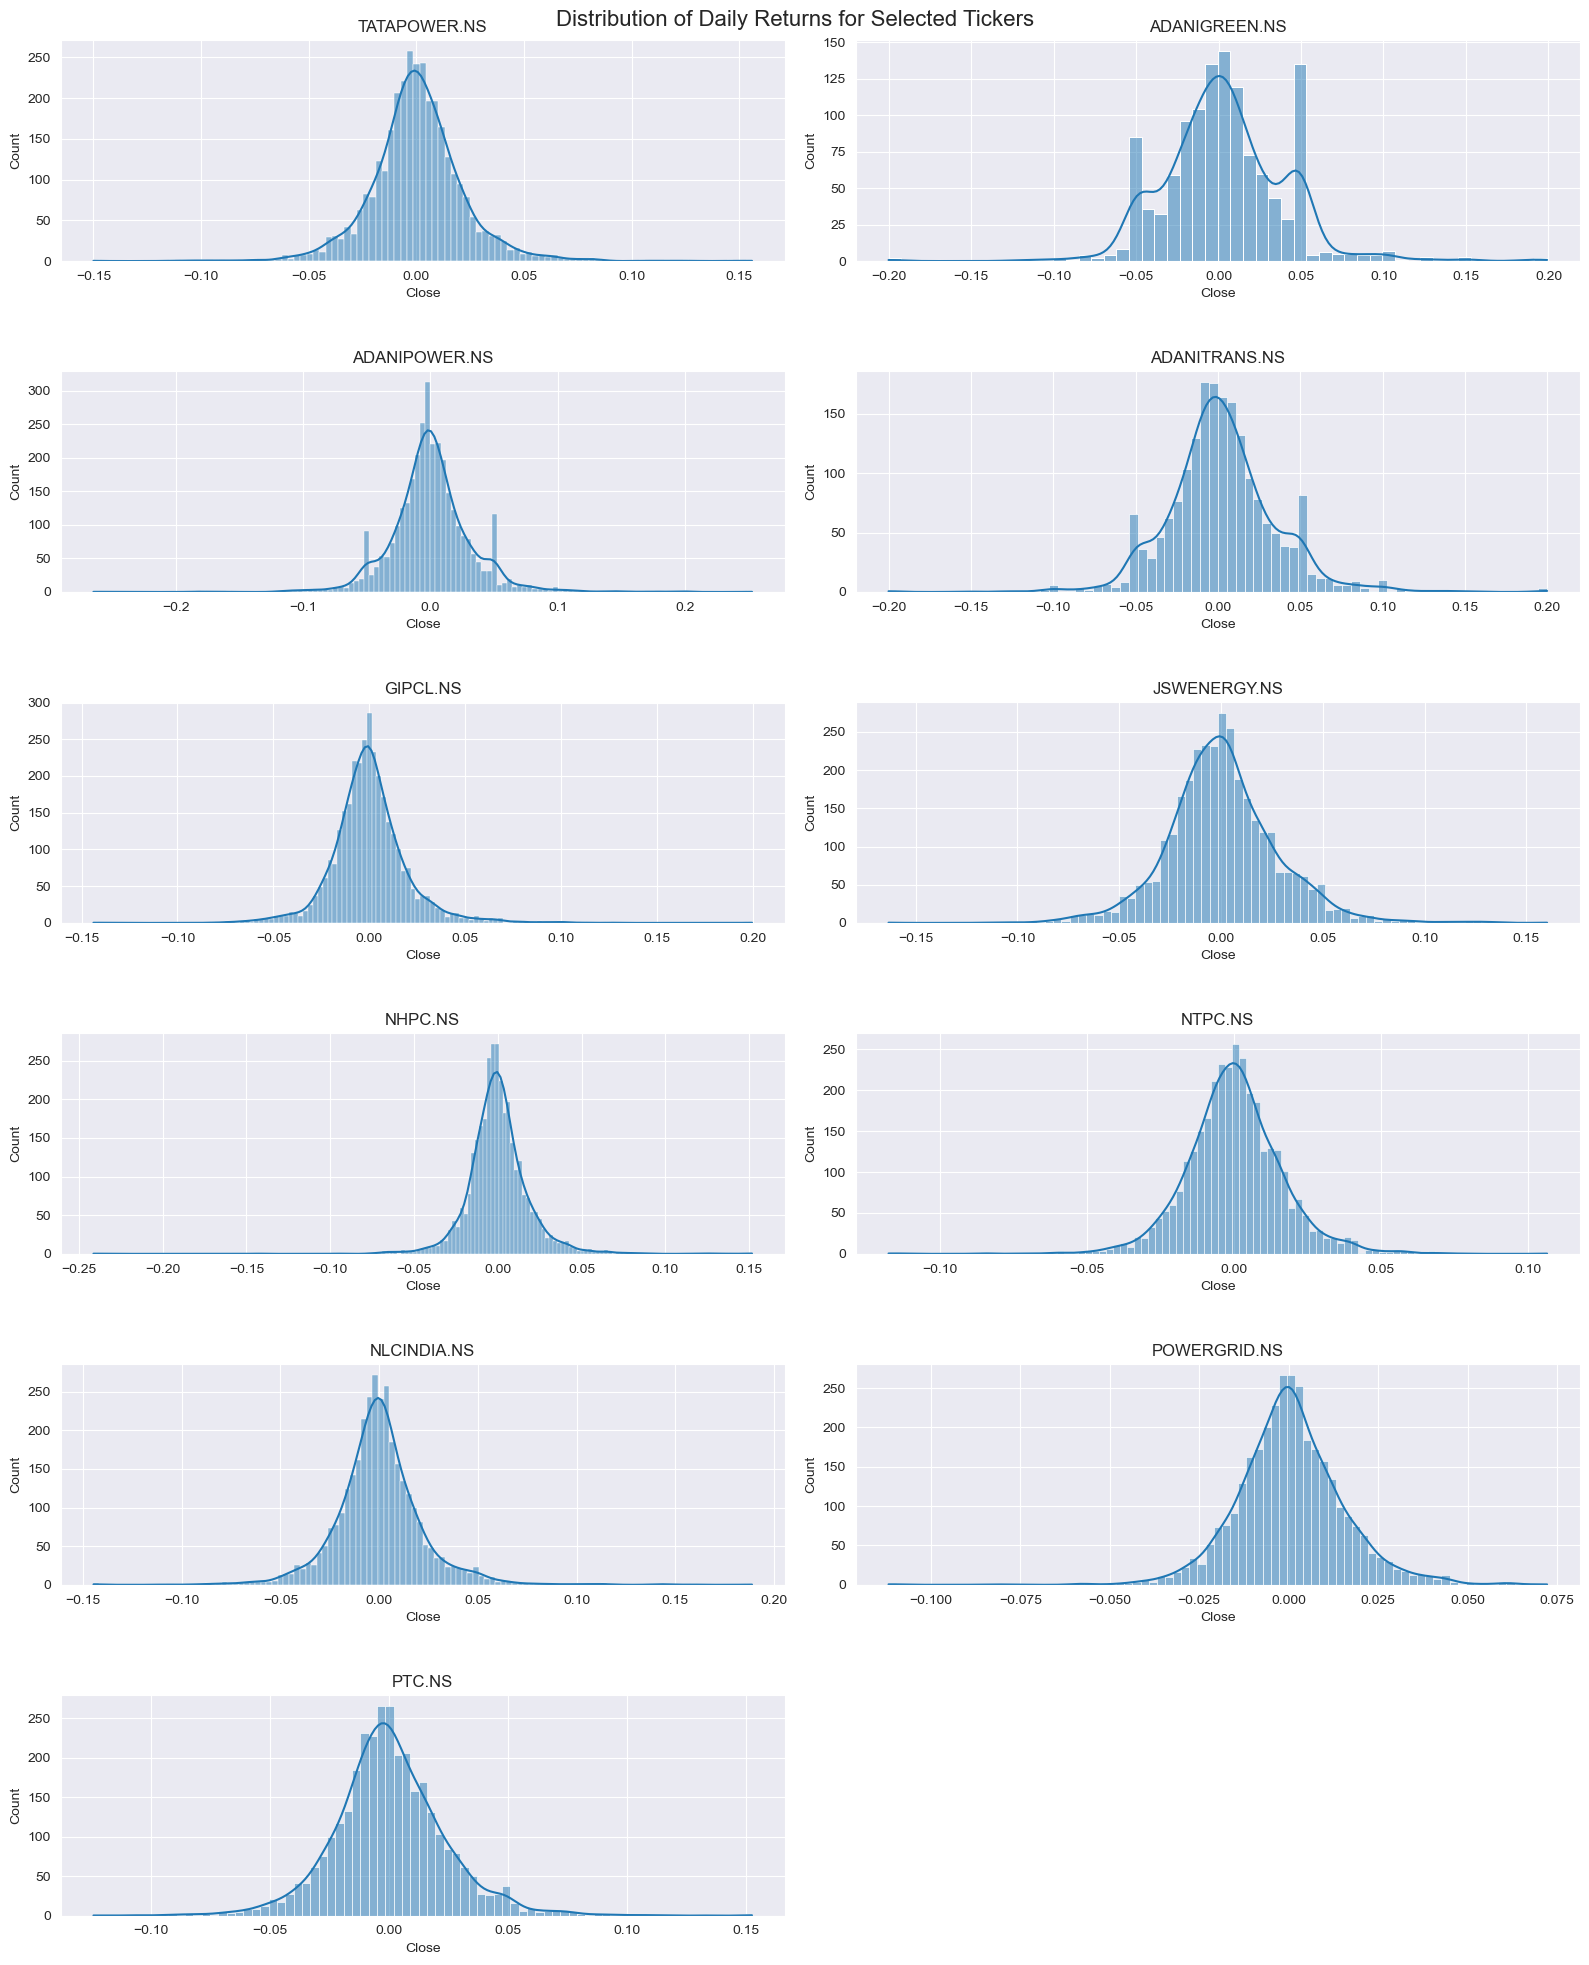

In [18]:

# Visualize distribution of daily returns

# Create the grid of subplots
fig, axs = plt.subplots(nrows=6, ncols=2, figsize=(16, 20))

# Loop over the subplots and plot each histogram
for i, ax in enumerate(axs.flat):
    if i < len(tickers_S):
        ticker_data = data[data['Company'] == tickers_S[i]]
        sns.histplot(ticker_data['Close'].pct_change().dropna(), kde=True, ax=ax)
        ax.set_title(tickers_S[i])
    else:
        ax.axis('off')

# Add common labels and adjust spacing
fig.suptitle('Distribution of Daily Returns for Selected Tickers', fontsize=16)
fig.tight_layout()
plt.subplots_adjust(hspace=0.5)

# Show the plot
plt.show()





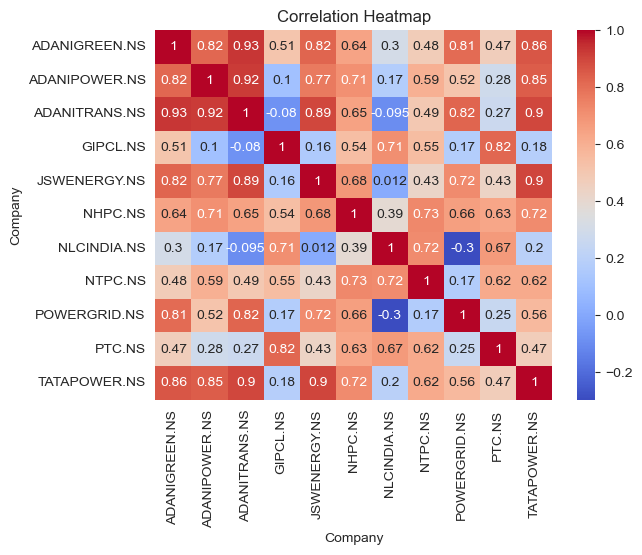

In [19]:

# Calculate correlation matrix and plot heatmap
corr_matrix = data.pivot_table(values='Close', index='Date', columns='Company').corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap')
plt.show()

# Feature Engineering:

# Moving Average:

In [20]:
# Reset the index
data = data.reset_index()

# Calculate moving averages for each stock
data['20-day MA'] = data.groupby('Company')['Close'].rolling(window=20).mean().reset_index(0, drop=True)
data['50-day MA'] = data.groupby('Company')['Close'].rolling(window=50).mean().reset_index(0, drop=True)
data['200-day MA'] = data.groupby('Company')['Close'].rolling(window=200).mean().reset_index(0, drop=True)

data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Company,20-day MA,50-day MA,200-day MA
32919,2023-05-23,93.199997,93.550003,92.750000,92.949997,92.949997,384805,0.0,0.0,PTC.NS,93.192500,91.674999,86.59300
32920,2023-05-24,93.000000,94.349998,93.000000,93.949997,93.949997,589566,0.0,0.0,PTC.NS,93.332499,91.664999,86.64750
32921,2023-05-25,93.900002,94.699997,93.349998,93.750000,93.750000,504961,0.0,0.0,PTC.NS,93.419999,91.620999,86.70200
32922,2023-05-26,93.449997,93.900002,92.800003,93.500000,93.500000,447125,0.0,0.0,PTC.NS,93.462499,91.602999,86.74725
32923,2023-05-29,95.000000,102.400002,95.000000,100.900002,100.900002,6084199,0.0,0.0,PTC.NS,93.757499,91.827000,86.83100


In [21]:
data.set_index('Date',inplace=True)

In [22]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Company,20-day MA,50-day MA,200-day MA
Date,,,,,,,,,,,,
2010-01-04,133.751373,135.097580,133.577682,134.079483,103.027641,3172720,0.0,0.0,TATAPOWER.NS,NaN,NaN,NaN
2010-01-05,134.716400,137.997452,134.422058,136.033646,104.529236,4254349,0.0,0.0,TATAPOWER.NS,NaN,NaN,NaN
2010-01-06,136.067413,144.366562,136.067413,142.344849,109.378822,8747201,0.0,0.0,TATAPOWER.NS,NaN,NaN,NaN
2010-01-07,142.822540,144.945572,139.444977,142.933517,109.831154,5495560,0.0,0.0,TATAPOWER.NS,NaN,NaN,NaN
2010-01-08,143.305054,144.077057,141.355713,142.856308,109.771820,3916987,0.0,0.0,TATAPOWER.NS,NaN,NaN,NaN


In [64]:
data.to_csv('stock.csv')

In [65]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Dividends',
       'Stock Splits', 'Company'],
      dtype='object')

# Train Test Split

In [66]:
train_data, test_data = train_test_split(data, test_size=0.3, shuffle=False)
#  A boolean parameter indicating whether or not to shuffle the data before splitting.
# shuffle=False, which means the data will not be shuffled, and the splitting will be performed in a sequential manner.

In [67]:
print(X_train.shape)
print(y_train.shape)

(2636, 10, 1)
(2636, 1)


In [68]:
len(train_data)

23046

In [69]:
len(test_data)

9878

In [70]:
# Select the data for a specific company
company_data = data[data['Company'] == 'NTPC.NS'].copy()

# Preprocess the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(company_data['Close'].values.reshape(-1, 1))

# Split the data into train and test sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Create sequences for input and output
def create_sequences(data, window_size):
    X = []
    y = []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

window_size = 10
X_train, y_train = create_sequences(train_data, window_size)
X_test, y_test = create_sequences(test_data, window_size)

# Define the LSTM model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(window_size, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print('Test Loss:', loss)

Epoch 1/10
83/83 [==============================] - 2s 5ms/step - loss: 0.0490
Epoch 2/10
83/83 [==============================] - 0s 5ms/step - loss: 0.0012
Epoch 3/10
83/83 [==============================] - 1s 7ms/step - loss: 9.6940e-04
Epoch 4/10
83/83 [==============================] - 0s 5ms/step - loss: 9.1106e-04
Epoch 5/10
83/83 [==============================] - 0s 5ms/step - loss: 8.5289e-04
Epoch 6/10
83/83 [==============================] - 0s 5ms/step - loss: 8.0921e-04
Epoch 7/10
83/83 [==============================] - 0s 5ms/step - loss: 7.9411e-04
Epoch 8/10
83/83 [==============================] - 0s 5ms/step - loss: 7.5077e-04
Epoch 9/10
83/83 [==============================] - 0s 5ms/step - loss: 6.8890e-04
Epoch 10/10
21/21 [==============================] - 0s 3ms/step - loss: 7.0293e-04
Test Loss: 0.000702928111422807


In [71]:
# Use the trained model to make predictions
predictions = model.predict(X_test)

# Inverse scale the predictions and actual values
predictions = scaler.inverse_transform(predictions)
actual_values = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(np.mean((predictions - actual_values)**2))
print('Root Mean Squared Error (RMSE):', rmse)

21/21 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 3.1212182133409057


21/21 [==============================] - 0s 3ms/step


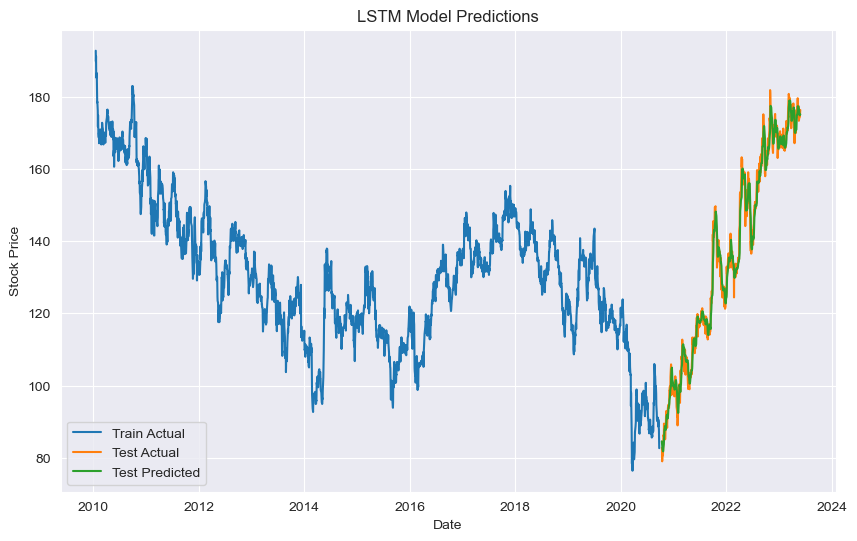

In [72]:
# Use the trained model to make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverse scale the predictions and actual values
train_predictions = scaler.inverse_transform(train_predictions)
train_actual_values = scaler.inverse_transform(y_train)
test_predictions = scaler.inverse_transform(test_predictions)
test_actual_values = scaler.inverse_transform(y_test)

# Get the dates corresponding to the train and test data
train_dates = company_data.index[window_size:train_size]
test_dates = company_data.index[train_size+window_size:]

# Plot the predicted and actual values
plt.figure(figsize=(10, 6))
plt.plot(train_dates, train_actual_values, label='Train Actual')
plt.plot(test_dates, test_actual_values, label='Test Actual')
plt.plot(test_dates, test_predictions, label='Test Predicted')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('LSTM Model Predictions')
plt.legend()
plt.show()

# Arima 

ARIMA and Seasonal ARIMA

Autoregressive Integrated Moving Averages

The general process for ARIMA models is the following:

----Visualize the Time Series Data

----Make the time series data stationary

----Find the optimal value of p,d,q

----Construct the ARIMA Model or Seasonal ARIMA based on the data

Use the model to make predictions

In [5]:
tatapower_data = data[data['Company'] == 'TATAPOWER.NS']
tatapower_data = tatapower_data[['Close']]  # Keep only the 'Close' price column

In [6]:
tatapower_data

,Close
Date,
2010-01-04,134.079483
2010-01-05,136.033646
2010-01-06,142.344849
2010-01-07,142.933517
2010-01-08,142.856308
...,...
2023-05-23,206.899994
2023-05-24,207.149994
2023-05-25,210.800003


<Axes: xlabel='Date'>

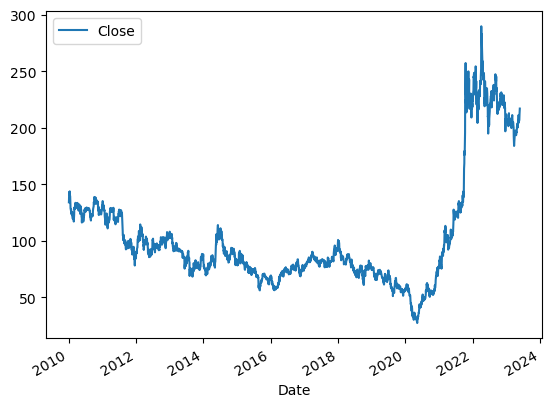

In [8]:
tatapower_data.plot()

In [18]:
prices = data['Close']

In [19]:
train_size = int(len(prices) * 0.8)
train_data = prices.iloc[:train_size]
test_data = prices.iloc[train_size:]

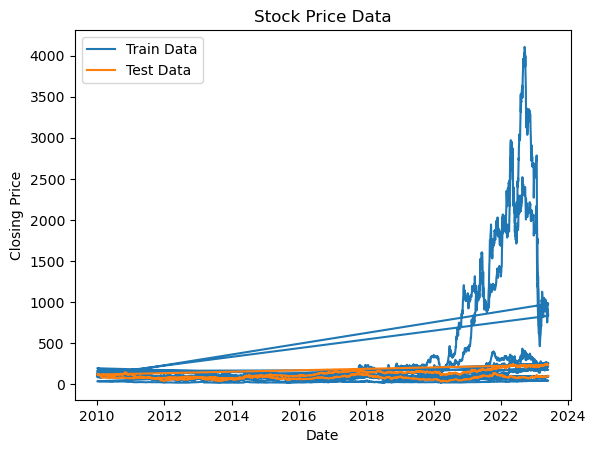

In [20]:
plt.plot(train_data, label='Train Data')
plt.plot(test_data, label='Test Data')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Stock Price Data')
plt.legend()
plt.show()

## Test for stationarity: Dickey-Fuller Test:

In [9]:
test_result=adfuller(tatapower_data['Close'])


Ho: It is non stationary

H1: It is stationary

In [10]:


def adfuller_test(Close):
    result=adfuller(Close)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    
adfuller_test(tatapower_data['Close'])

ADF Test Statistic : -0.6452724509207446
p-value : 0.8604207460967623
#Lags Used : 12
Number of Observations Used : 3295
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [11]:
# Perform seasonal differencing on the 'Close' data
seasonal_diff = tatapower_data['Close'] - tatapower_data['Close'].shift(12)  # Assuming a seasonal period of 12 (one year)

# Drop the NaN values resulting from the differencing
seasonal_diff = seasonal_diff.dropna()

In [12]:
adfuller_test(seasonal_diff)

ADF Test Statistic : -9.786074295084953
p-value : 6.538427758003986e-17
#Lags Used : 26
Number of Observations Used : 3269
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [13]:
tatapower_data.head()

,Close
Date,
2010-01-04,134.079483
2010-01-05,136.033646
2010-01-06,142.344849
2010-01-07,142.933517
2010-01-08,142.856308


Since  the p-value is less than the significance level of 0.05, we can conclude that the series is stationary.

Stationarity implies that the series does not exhibit any significant trends or seasonality and has a constant mean and variance over time.

based on the ADF test results, the series can be considered stationary.

<Axes: xlabel='Date'>

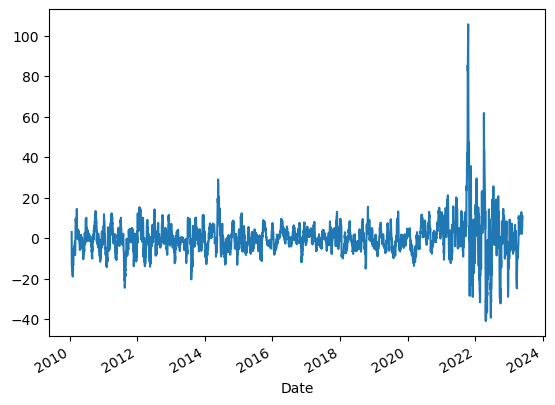

In [18]:
seasonal_diff.plot()

## Finding the optimal values of ARIMA parameters - p,q and d

Using Auto ARIMA (AutoRegressive Integrated Moving Average) algorithm

In [34]:

# Find the best order using auto_arima
model = auto_arima(train_data, trace=True, suppress_warnings=True)
best_order = model.order

# Print the best order
print("Best Order (p, d, q):", best_order)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=218475.133, Time=18.97 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=219218.041, Time=0.70 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=218693.965, Time=0.93 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=218703.983, Time=2.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=219216.042, Time=0.37 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=218496.967, Time=13.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=218511.808, Time=23.87 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=218449.870, Time=24.86 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=218449.173, Time=17.86 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=218625.165, Time=1.48 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=218449.282, Time=33.81 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=218695.024, Time=1.25 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=218529.808, Time=1.95 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=218410.882, Time=40.79 se

In [19]:
model = ARIMA(train_data, order=(3,1,3))
model_fit = model.fit()

In [20]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                26339
Model:                 ARIMA(3, 1, 3)   Log Likelihood             -109181.772
Date:                Fri, 30 Jun 2023   AIC                         218377.545
Time:                        15:30:35   BIC                         218434.796
Sample:                             0   HQIC                        218396.029
                              - 26339                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5933      0.010    -58.998      0.000      -0.613      -0.574
ar.L2          0.6784      0.007    101.787      0.000       0.665       0.691
ar.L3          0.5646      0.007     79.187      0.000       0.551       0.579
ma.L1          0.7279      0.010     73.742      0.000       0.709       0.747
ma.L2         -0.5810      0.008    -73.581      0.000      -0.596      -0.565
ma.L3         -0.5929      0.006   -100.869      0.000      -0.604      -0.581
sigma2       233.4403      0.109   2143.830      0.000     233.227     233.654
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):         559733355.13
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.02   Skew:                           -13.12
Prob(H) (two-sided):                  0.00   Kurtosis:                       716.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [14]:
# Assuming tatapower_data is your DataFrame with daily data

# Convert the 'Date' column to datetime type if it's not already
#tatapower_data['Date'] = pd.to_datetime(tatapower_data['Date'])

# Set the 'Date' column as the index
#tatapower_data.set_index('Date', inplace=True)

# Resample the data to monthly frequency and aggregate using the mean
monthly_data = tatapower_data.resample('M').mean()

# Reset the index
monthly_data = monthly_data.reset_index()

# Print the aggregated monthly data
print(monthly_data)

          Date       Close
0   2010-01-31  136.327719
1   2010-02-28  122.121144
2   2010-03-31  130.096949
3   2010-04-30  130.350900
4   2010-05-31  125.099310
..         ...         ...
156 2023-01-31  206.814287
157 2023-02-28  204.575002
158 2023-03-31  200.988095
159 2023-04-30  196.558824
160 2023-05-31  206.550000

[161 rows x 2 columns]


In [ ]:


# Fit the SARIMAX model
model = sm.tsa.statespace.SARIMAX(train_data, order=(3, 1, 3), seasonal_order=(3, 1, 3, 12))
results = model.fit()


In [ ]:
# Generate forecasts
forecast = results.get_forecast(steps=len(test_data))
forecast_values = forecast.predicted_mean

In [ ]:
# Add the forecast values to the DataFrame
tatapower_data['forecast'] = pd.concat([pd.Series([None] * len(train_data)), forecast_values])

In [31]:
forecast_values = results.get_forecast(steps=len(tatapower_data))
tatapower_data['forecast'] = forecast_values.predicted_mean

NameError: name 'results' is not defined

In [26]:
tatapower_data['forecast']=model_fit.predict()
tatapower_data[['Close','forecast']].plot(figsize=(12,8))

ValueError: cannot reindex on an axis with duplicate labels

In [21]:
import statsmodels.api as sm

In [25]:
model=sm.tsa.statespace.SARIMAX(train_data,order=(1, 0, 1),seasonal_order=(1,0,1,12))
results=model.fit()

MemoryError: Unable to allocate 39.4 MiB for an array with shape (14, 14, 26339) and data type float64

In [82]:
forecast_values = model_fit.forecast(len(test_data))
forecast_df = pd.DataFrame(forecast_values)
print(forecast_values)
print(forecast_df )
forecast_df['date'] = test_data.index

forecast_df = forecast_df.set_index('date')

#forecast_df.drop(columns='index', inplace=True)

forecast_df.rename(columns = {0:'Forecast'}, inplace = True)


forecast_df = pd.DataFrame(forecast_values)

#forecast_df['date'] = test_data.index

#forecast_df = forecast_df.set_index('date')

#forecast_df.drop(columns='index', inplace=True)

#forecast_df.rename(columns = {0:'Forecast'}, inplace = True)


# Create a new DataFrame for the forecast values
forecast_df = pd.DataFrame(forecast_values, index=test_data.index, columns=['Forecast'])

26339    80.054644
26340    80.060103
26341    80.010214
26342    79.890871
26343    79.930910
           ...    
32919    79.501292
32920    79.501292
32921    79.501292
32922    79.501292
32923    79.501292
Name: predicted_mean, Length: 6585, dtype: float64
       predicted_mean
26339       80.054644
26340       80.060103
26341       80.010214
26342       79.890871
26343       79.930910
...               ...
32919       79.501292
32920       79.501292
32921       79.501292
32922       79.501292
32923       79.501292

[6585 rows x 1 columns]


In [86]:
# Drop rows with missing values in test_data
test_data = test_data.dropna()

# Generate forecast values
forecast_values = model_fit.forecast(len(test_data))

# Create forecast_df DataFrame with forecast values
forecast_df = pd.DataFrame(forecast_values, index=test_data.index, columns=['Forecast'])

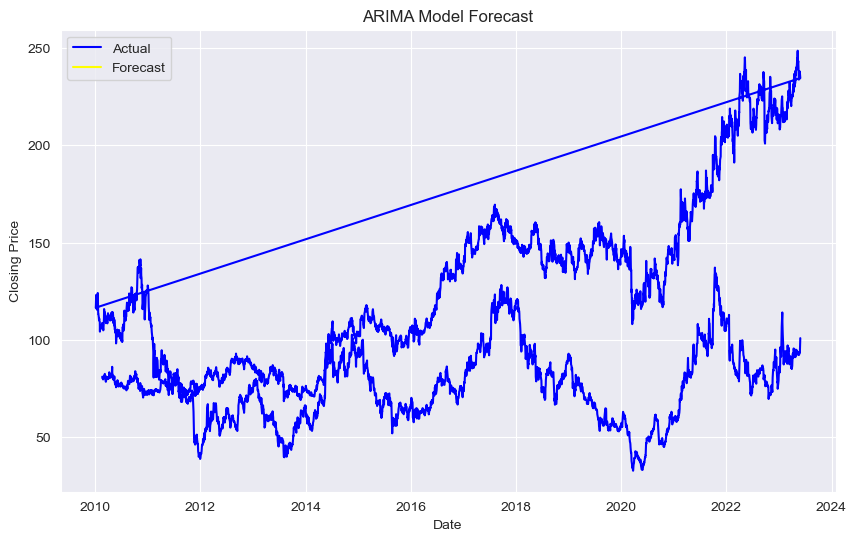

In [87]:
# Plot the actual and forecasted closing prices
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data.values, label='Actual',color='blue')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast', color='yellow')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('ARIMA Model Forecast')
plt.legend()
plt.show()

In [84]:
print(forecast_values)

26339    80.054644
26340    80.060103
26341    80.010214
26342    79.890871
26343    79.930910
           ...    
32919    79.501292
32920    79.501292
32921    79.501292
32922    79.501292
32923    79.501292
Name: predicted_mean, Length: 6585, dtype: float64


In [88]:
print(forecast_df )

           Forecast
Date               
2010-02-18      NaN
2010-02-19      NaN
2010-02-22      NaN
2010-02-23      NaN
2010-02-24      NaN
...             ...
2023-05-23      NaN
2023-05-24      NaN
2023-05-25      NaN
2023-05-26      NaN
2023-05-29      NaN

[6585 rows x 1 columns]
